In [47]:
# This is the starter code for Homework 1. You are expected to extend this code to finish the assignment

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree


In [49]:
# Load data
import pandas as pd

# Define the file path (using a raw string to avoid issues with backslashes)
file_path = r"C:\Users\punit\OneDrive\Desktop\advanced apps analytics\telecom_customers.csv"

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0           1    Male              0      No        Yes       4          Yes   
1           2  Female              0      No        Yes      52          Yes   
2           3    Male              0      No         No       0          Yes   
3           4    Male              1      No        Yes      12          Yes   
4           5    Male              0     Yes        Yes       7          Yes   

  MultipleLines InternetService       OnlineSecurity  ...  \
0           Yes     Fiber optic                   No  ...   
1            No             DSL                  Yes  ...   
2            No             DSL                   No  ...   
3           Yes              No  No internet service  ...   
4           Yes             DSL                  Yes  ...   

      DeviceProtection          TechSupport          StreamingTV  \
0                  Yes                  Yes                   No   
1               

In [50]:
# Task 1a: Print churn distribution and calculate baseline accuracy
print(df.describe())
churn_count=(df['Churn'].value_counts())
print(churn_count)

accuracy = churn_count.max() / churn_count.sum()
print(accuracy)


        customerID  SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count  1000.000000    1000.000000  1000.000000     1000.000000    950.000000
mean    500.500000       0.205000    18.840000       66.176350   1300.984674
std     288.819436       0.403904    18.199605       25.689766   1377.599458
min       1.000000       0.000000     0.000000       18.000000     17.210000
25%     250.750000       0.000000     5.000000       51.857500    313.557500
50%     500.500000       0.000000    13.000000       70.365000    805.730000
75%     750.250000       0.000000    28.000000       85.595000   1795.007500
max    1000.000000       1.000000    72.000000      112.900000   7946.510000
Churn
No     732
Yes    268
Name: count, dtype: int64
0.732


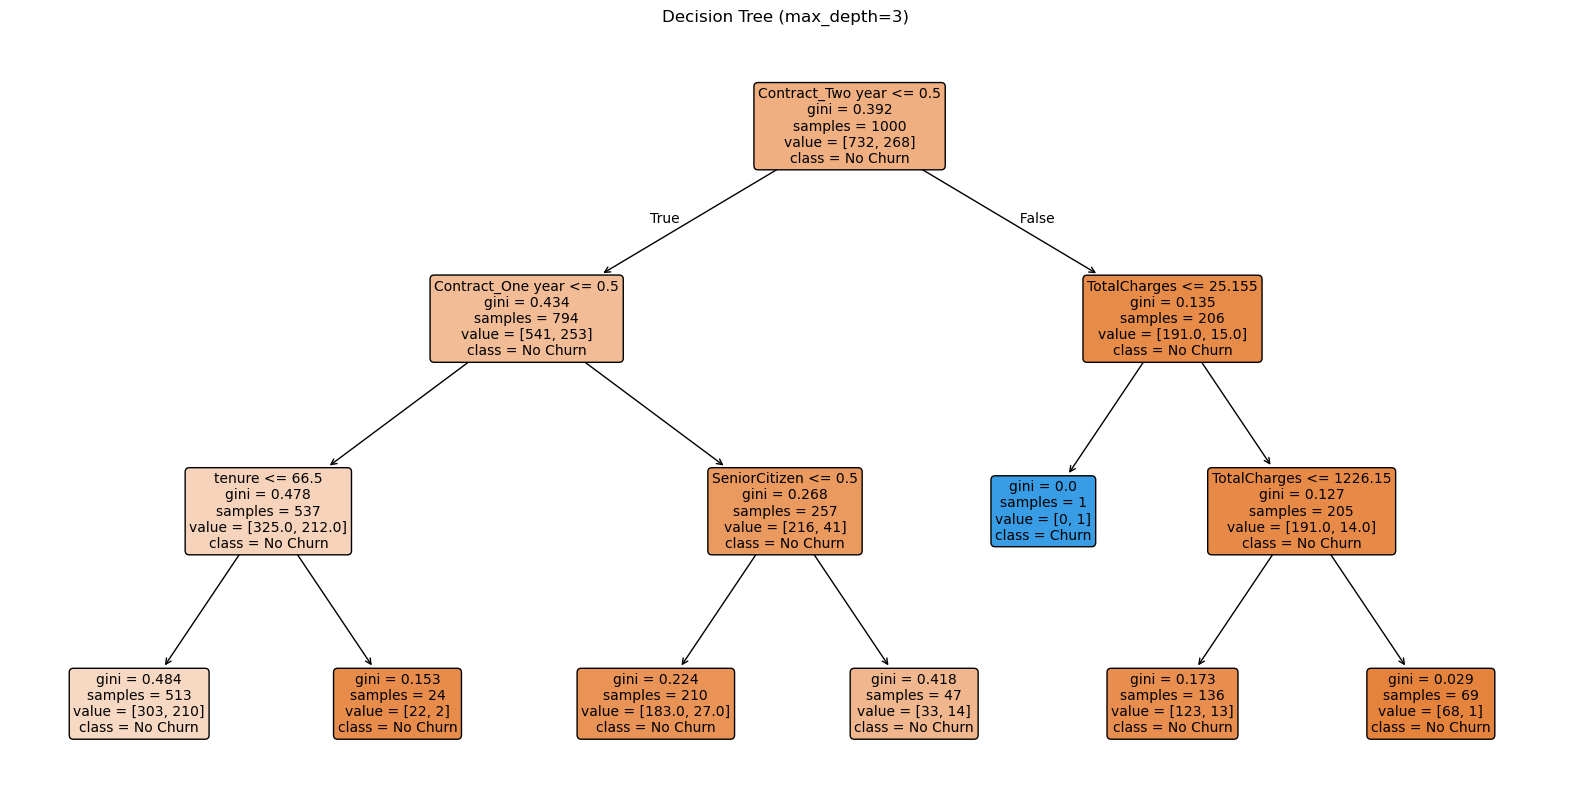

The top feature used for splitting is: Contract_Two year
Decision Tree CV scores: [0.735 0.735 0.73  0.73  0.73 ]
Decision Tree variance: 6.000000000000012e-06

Logistic Regression CV scores: [0.71  0.695 0.71  0.735 0.735]
Logistic Regression variance: 0.00024600000000000045

Model with higher variance in its scores: Logistic Regression
Explanation: This suggests that the Logistic Regression model is more sensitive to data splits, indicating a higher risk of overfitting.
Confusion Matrix:
[[141   0]
 [ 59   0]]

Total Misclassification Cost: $ 29500

Classification Summary:
              precision    recall  f1-score   support

           0       0.70      1.00      0.83       141
           1       0.00      0.00      0.00        59

    accuracy                           0.70       200
   macro avg       0.35      0.50      0.41       200
weighted avg       0.50      0.70      0.58       200



c:\Users\punit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\punit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\punit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [51]:
# Task 1b: Create and visualize decision tree

import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np

#I separate the features and target variable
X = df.drop('Churn', axis=1)
y = df['Churn']

#I encode categorical variables using one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)

#I create and train the decision tree classifier with max_depth=3
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_encoded, y)

#I plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X_encoded.columns, class_names=['No Churn', 'Churn'],
          filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree (max_depth=3)")
plt.show()

#I identify the top feature used for splitting the tree
top_feature_index = clf.tree_.feature[0]
top_feature_name = X_encoded.columns[top_feature_index]
print("The top feature used for splitting is:", top_feature_name)

#The result matches by business intuition since customers who have longer contracts with the telecom company are more likey to keep using the service and not churn compared to
#customers who are on a shorter contract. This is because customers get better deals and discounts for longer contracts, which incentivizes them to stay with the company.

# Task 1c: Cross-validation on two models
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

#I encode y variable
le = LabelEncoder()
y_encoded = le.fit_transform(y) 

#I impute missing values in X_encoded using the mean for numeric features
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_encoded)

#I initialize the models
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
lr_model = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42)

#I perform 5-fold cross-validation on both models using the imputed data
dt_scores = cross_val_score(dt_model, X_imputed, y_encoded, cv=5)
lr_scores = cross_val_score(lr_model, X_imputed, y_encoded, cv=5)

#I calculate the variance of the cross-validation scores for each model
dt_variance = np.var(dt_scores)
lr_variance = np.var(lr_scores)

#I print the cross-validation scores and their variances
print("Decision Tree CV scores:", dt_scores)
print("Decision Tree variance:", dt_variance)
print("\nLogistic Regression CV scores:", lr_scores)
print("Logistic Regression variance:", lr_variance)

#I identify which model shows higher variance
if dt_variance > lr_variance:
    model_with_higher_variance = "Decision Tree"
    explanation = ("This suggests that the Decision Tree model is more sensitive to data splits, indicating a higher risk of overfitting.")
else:
    model_with_higher_variance = "Logistic Regression"
    explanation = ("This suggests that the Logistic Regression model is more sensitive to data splits, indicating a higher risk of overfitting.")

print("\nModel with higher variance in its scores:", model_with_higher_variance)
print("Explanation:", explanation)

# Task 1d: Confusion matrix and cost calculation
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

#I fit the Decision Tree model (max_depth=3) on the training data
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)

#I predict churn on the test set
y_pred = dt_model.predict(X_test)

#I compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
# Confusion Matrix format:
# [[True Negatives (TN), False Positives (FP)],
#  [False Negatives (FN), True Positives (TP)]]

#I define the costs for false positives andf false negatives
cost_false_positive = 100  # the cost for a false positive
cost_false_negative = 500  # the cost for a false negative

#I extract TN, FP, FN, TP from the confusion matrix
TN, FP, FN, TP = cm.ravel()

#I calculate the total misclassification cost
total_cost = FP * cost_false_positive + FN * cost_false_negative
print("\nTotal Misclassification Cost: $", total_cost)

#I print the classification summary
print("\nClassification Summary:")
print(classification_report(y_test, y_pred))



   customerid  gender  seniorcitizen partner dependents  tenure phoneservice  \
0           1    Male              0      No        Yes       4          Yes   
1           2  Female              0      No        Yes      52          Yes   
2           3    Male              0      No         No       0          Yes   
3           4    Male              1      No        Yes      12          Yes   
4           5    Male              0     Yes        Yes       7          Yes   

  multiplelines internetservice       onlinesecurity  ...  \
0           Yes     Fiber optic                   No  ...   
1            No             DSL                  Yes  ...   
2            No             DSL                   No  ...   
3           Yes              No  No internet service  ...   
4           Yes             DSL                  Yes  ...   

      deviceprotection          techsupport          streamingtv  \
0                  Yes                  Yes                   No   
1               

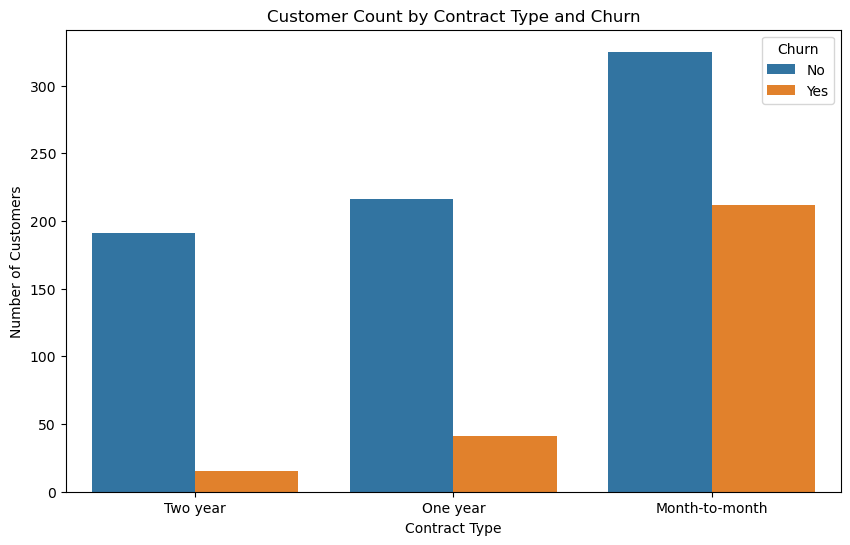

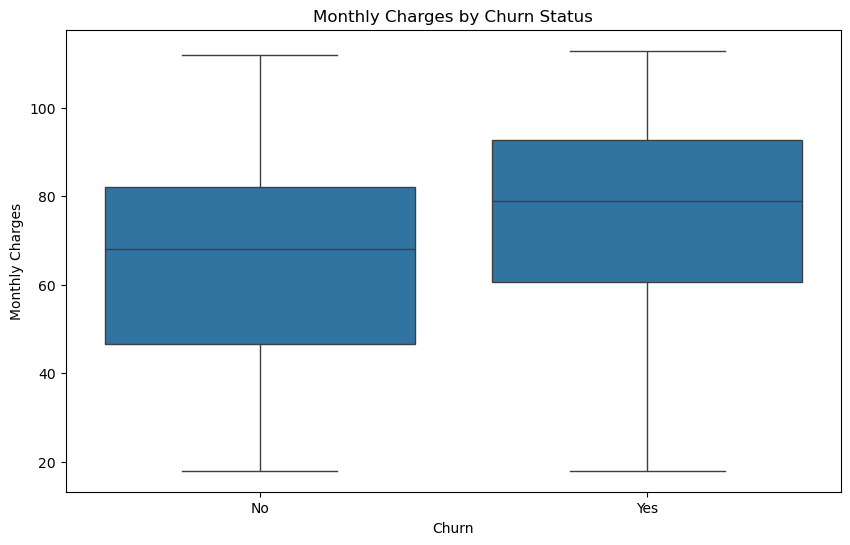

Processed feature set shape: (1000, 30)
Processed target shape: (1000,)


In [ ]:
# Continue with remaining tasks...
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# I standardize the column names by removing spaces and converting to lowercase
df.columns = df.columns.str.strip().str.lower()

# I display the first few rows of the dataframe to check changes
print(df.head())

# Visualization 1: I create a bar plot of customer count by contract type and churn status
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='contract', hue='churn')
plt.title("Customer Count by Contract Type and Churn")
plt.xlabel("Contract Type")
plt.ylabel("Number of Customers")
plt.legend(title="Churn")
plt.show()

# Visualization 2: I plot a boxplot of monthly charges by customer churn status
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='churn', y='monthlycharges')
plt.title("Monthly Charges by Churn Status")
plt.xlabel("Churn")
plt.ylabel("Monthly Charges")
plt.show()

#2b I preprocess the data appropriately for machine learning
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

#I standardize column names to lowercase and remove extra whitespace
df.columns = df.columns.str.strip().str.lower()

#I drop non-informative columns (e.g., 'customerid')
df = df.drop(columns=["customerid"], errors='ignore')

#I encode the target variable that is churn
le = LabelEncoder()
df["churn"] = le.fit_transform(df["churn"])

#I identify categorical columns for one-hot encoding (exclude the target 'churn')
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()
if "churn" in categorical_cols:
    categorical_cols.remove("churn")

#I one-hot encode categorical features
df_processed = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

#I encode the numerical features. The numerical features are tenure, monthly charges, and total charges.
numeric_cols = ["tenure", "monthlycharges", "totalcharges"]
scaler = StandardScaler()
df_processed[numeric_cols] = scaler.fit_transform(df_processed[numeric_cols])

#I separate the features (X) and target (y)
X = df_processed.drop("churn", axis=1)
y = df_processed["churn"]

#For my reference, I print the shapes of the processed feature set and the target variable
print("Processed feature set shape:", X.shape)
print("Processed target shape:", y.shape)





In [41]:
#2c. Implement three classification models from the list below. Use 5-fold cross validation and report average performance metrics for each. (6 pts)
#Logistic Regression
#K-Nearest Neighbors
#Random Forest
#XGBoost

import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

#X is my features and y is my target variable. I impute missing values in X using mean.
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

#I define the scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

#I initialize the three models
lr_model = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42)
knn_model = KNeighborsClassifier()  # Default parameters
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

#I perform 5-fold cross-validation for each model using the imputed data. I use KFold cross validation where K=5. 
lr_results = cross_validate(lr_model, X_imputed, y, cv=5, scoring=scoring)
knn_results = cross_validate(knn_model, X_imputed, y, cv=5, scoring=scoring)
rf_results = cross_validate(rf_model, X_imputed, y, cv=5, scoring=scoring)

#I write this function to print average performance metrics
def print_results(model_name, results):
    print(f"Results for {model_name}:")
    print("  Accuracy:  {:.3f}".format(np.mean(results['test_accuracy'])))
    print("  Precision: {:.3f}".format(np.mean(results['test_precision'])))
    print("  Recall:    {:.3f}".format(np.mean(results['test_recall'])))
    print("  F1 Score:  {:.3f}".format(np.mean(results['test_f1'])))
    print("-" * 40)

#I print results for each model
print_results("Logistic Regression", lr_results)
print_results("K-Nearest Neighbors", knn_results)
print_results("Random Forest", rf_results)



Results for Logistic Regression:
  Accuracy:  0.723
  Precision: 0.454
  Recall:    0.168
  F1 Score:  0.241
----------------------------------------
Results for K-Nearest Neighbors:
  Accuracy:  0.675
  Precision: 0.336
  Recall:    0.209
  F1 Score:  0.257
----------------------------------------
Results for Random Forest:
  Accuracy:  0.734
  Precision: 0.506
  Recall:    0.142
  F1 Score:  0.214
----------------------------------------


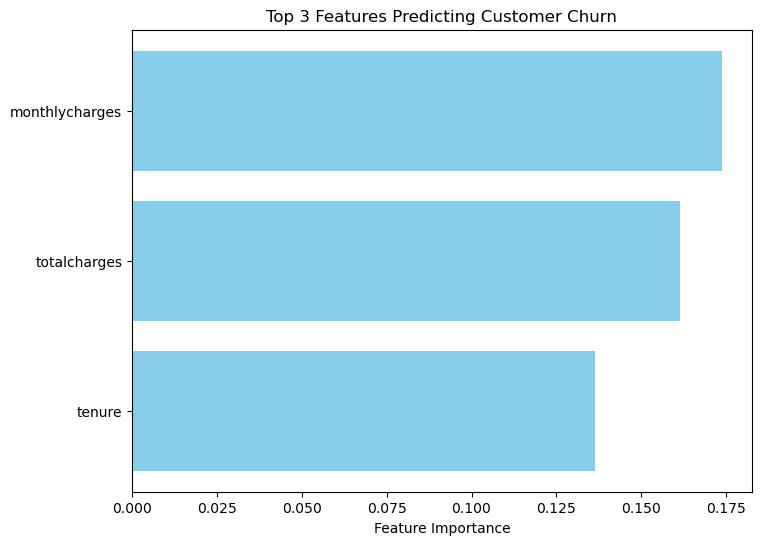

Top 3 features predicting churn:
monthlycharges: 0.174
totalcharges: 0.161
tenure: 0.136


In [24]:
#3A. 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

# If X contains missing values, I impute them:
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

#I train the Random Forest model since it is the best performing model.
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_imputed, y)

#I extract feature importances from the trained model
importances = rf_model.feature_importances_
#I get indices that would sort the importances array in descending order
indices = np.argsort(importances)[::-1]
#I get the top three indices
top3_indices = indices[:3]
#I retrieve the feature names and their importances
top3_features = X.columns[top3_indices]
top3_importances = importances[top3_indices]

#I create a bar chart visualizing the top three features
plt.figure(figsize=(8,6))
plt.barh(top3_features, top3_importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Top 3 Features Predicting Customer Churn")
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

#I print the top three features
print("Top 3 features predicting churn:")
for feature, importance in zip(top3_features, top3_importances):
    print(f"{feature}: {importance:.3f}")


In [ ]:
#3B. 

#Action one
#Considering monthly charges have the highest impact on churn, the company should offer flexible pricing plans or discounts for customers who have a high monthly charge, 
#reducing their monthly spending and incentivizing them to stay with the service.

#Action two
#Considering total charges and tenure have a signfiicant impact on customer churn, the company should implement a loyalty program that rewards long term customers
#with a high total spending, encourgaing them to remain with the service and reducing churn.
